# Importación de Librerias

In [1]:
# Análisis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

---

In [2]:
!dir

 Volume in drive C is Primary
 Volume Serial Number is BE88-FD3B

 Directory of C:\Users\noroot\Desktop\precio-inmueble-ml

08/23/2025  02:25 PM    <DIR>          .
08/23/2025  02:25 PM    <DIR>          ..
08/23/2025  01:37 PM                17 .gitignore
08/23/2025  02:25 PM    <DIR>          .ipynb_checkpoints
08/23/2025  01:46 PM    <DIR>          .venta
08/23/2025  01:39 PM    <DIR>          BELLAVISTA
08/23/2025  02:10 PM           341,263 dataset_bellavista.ipynb
08/23/2025  02:07 PM             1,105 dataset_bellavista.pkl
08/23/2025  01:39 PM            30,149 dataset_bellavista.xlsx
08/23/2025  02:25 PM           339,165 dataset_los_olivos.ipynb
08/23/2025  02:19 PM             1,105 dataset_los_olivos.pkl
08/23/2025  01:39 PM            68,780 dataset_los_olivos.xlsx
08/23/2025  02:25 PM           339,165 dataset_magdalena.ipynb
08/23/2025  01:39 PM           137,250 dataset_magdalena.xlsx
08/23/2025  01:39 PM    <DIR>          MAGDALENA
               9 File(s)      1,257,9

In [3]:
# lectura del archivo excel
df = pd.read_excel("dataset_magdalena.xlsx")

In [4]:
filas, columnas = df.shape
print("Número de filas:", filas)
print("Número de columnas:", columnas)

Número de filas: 2313
Número de columnas: 12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           2313 non-null   int64  
 1   Trimestre                     2313 non-null   int64  
 2   Precio en dólares corrientes  2313 non-null   float64
 3   Tipo de cambio                2313 non-null   float64
 4   Distrito                      2313 non-null   object 
 5   Superficie                    2313 non-null   int64  
 6   Número de habitaciones        2313 non-null   int64  
 7   Número de baños               2313 non-null   int64  
 8   Número de garajes             2313 non-null   int64  
 9   Piso de ubicación             2110 non-null   float64
 10  Vista al exterior             2110 non-null   float64
 11  Años de antigüedad            2313 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 217.0+ KB


In [6]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Distrito,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Vista al exterior,Años de antigüedad
0,2021,1,150275.0,3.659334,Magdalena,85,3,2,1,NaN,NaN,9
1,2021,1,193600.0,3.659334,Magdalena,94,3,2,1,NaN,NaN,0
2,2021,1,215000.0,3.659334,Magdalena,111,3,2,2,NaN,NaN,3
3,2021,1,117000.0,3.659334,Magdalena,78,3,2,1,NaN,NaN,8
4,2021,1,93000.0,3.659334,Magdalena,53,1,1,1,NaN,NaN,1


In [7]:
df.isnull().sum()

Año                               0
Trimestre                         0
Precio en dólares corrientes      0
Tipo de cambio                    0
Distrito                          0
Superficie                        0
Número de habitaciones            0
Número de baños                   0
Número de garajes                 0
Piso de ubicación               203
Vista al exterior               203
Años de antigüedad                0
dtype: int64

## Eliminar columnas

**Columna Distrito**
- En los datos, todos los registros tienen el valor "Bellavista" → no aporta variabilidad al modelo.
- Si todos los valores son iguales, esta variable no ayuda a explicar el precio

**Vista al exterior**
- Según los datos, solo contiene "1" o vacío.
- Si casi todos son "1" → es prácticamente constante, no aporta valor.

In [8]:
df.drop(["Distrito", "Vista al exterior"], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           2313 non-null   int64  
 1   Trimestre                     2313 non-null   int64  
 2   Precio en dólares corrientes  2313 non-null   float64
 3   Tipo de cambio                2313 non-null   float64
 4   Superficie                    2313 non-null   int64  
 5   Número de habitaciones        2313 non-null   int64  
 6   Número de baños               2313 non-null   int64  
 7   Número de garajes             2313 non-null   int64  
 8   Piso de ubicación             2110 non-null   float64
 9   Años de antigüedad            2313 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 180.8 KB


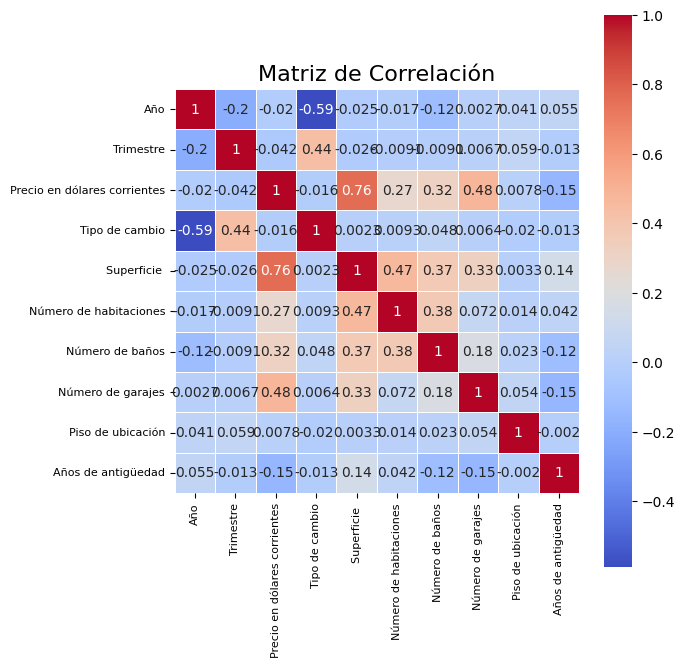

In [10]:
# Calcular la correlación
corr = df.corr()

plt.figure(figsize=(len(corr.columns) * 0.7, len(corr.columns) * 0.7))  # ajustar tamaño dinámico
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    cbar=True,
    square=True,        # celdas cuadradas
    linewidths=0.5
)

plt.title("Matriz de Correlación", fontsize=16)
plt.xticks(rotation=90, fontsize=8)   # gira labels eje X
plt.yticks(rotation=0, fontsize=8)    # labels eje Y
plt.tight_layout()
plt.show()

¡Muy bien 👌! Lo que muestras es una **matriz de correlación** entre todas las variables numéricas de tu dataset.
Vamos a interpretarla con respecto al **target: "Precio en dólares corrientes"**.

---

### 🔹 ¿Qué es la correlación?

* Es un valor entre **-1 y 1** que mide la fuerza y dirección de la relación lineal entre dos variables.

  * **1.0** → correlación positiva perfecta (si sube X, también sube Y).
  * **0** → no hay relación lineal.
  * **-1.0** → correlación negativa perfecta (si sube X, baja Y).

En la matriz:

* Rojo → correlación positiva.
* Azul → correlación negativa.
* Celdas con valores cercanos a 0 → casi sin relación.

---

### 🔹 Variables más relacionadas con el **Precio en dólares corrientes**

De la matriz que muestras:

1. **Superficie (0.76)** → **fuerte correlación positiva**.
   👉 A mayor superficie, mayor precio. Es la variable más importante.

2. **Número de habitaciones (0.49)** → correlación positiva moderada.
   👉 Más habitaciones tienden a aumentar el precio.

3. **Tipo de cambio (≈ -0.095, muy bajo)** → correlación casi nula.
   👉 No influye de manera lineal.

4. **Número de baños (0.34)** → correlación positiva moderada-baja.

5. **Número de garajes (0.18)** → correlación baja pero positiva.

6. **Piso de ubicación (0.065)** y **Años de antigüedad (0.028)** → correlación casi nula.

7. **Año (-0.014)** y **Trimestre (-0.11)** → prácticamente sin relación con el precio.

---

### 🔹 Conclusión para tu modelo de regresión

* Las variables que más impacto **lineal** tienen en el precio son:
  ✅ **Superficie**
  ✅ **Número de habitaciones**
  ✅ **Número de baños**
  (posiblemente **Número de garajes** también aunque sea más débil).

* Variables como **Año, Trimestre, Antigüedad, Piso** tienen muy baja correlación lineal, aunque podrían ser útiles en modelos no lineales (RandomForest, XGBoost).

---

📊 En resumen:

* **Superficie es tu predictor más fuerte** (0.76).
* Después siguen **habitaciones y baños**.
* Las demás aportan poco si hablamos de regresión lineal, pero no significa que debas descartarlas de inmediato (podrían tener efectos combinados).

---

¿Quieres que te arme un **ranking visual de importancia de variables** (con un gráfico de barras) para que veas cuáles pesan más sobre el precio antes de entrenar tu modelo?


In [11]:
# 1. Preparar los datos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Supongamos que tu dataframe se llama df
y = df["Precio en dólares corrientes"]
X = df.drop(columns=["Precio en dólares corrientes"])  # quitamos el target

# 2. Separar en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Crear pipeline con imputación + escalado + modelo
pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),  # reemplaza NaN por la mediana
    ("scaler", StandardScaler()),                  # normaliza
    ("model", LinearRegression())                  # regresión lineal
])

# 4. Entrenar la regresión lineal
pipeline.fit(X_train, y_train)

# 5. Ver importancia por coeficientes
coef = pipeline.named_steps["model"].coef_

importancia_coef = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": coef,
    "Influencia_abs": abs(coef)
}).sort_values(by="Influencia_abs", ascending=False)

print("📊 Importancia por coeficientes:")
print(importancia_coef)

# 6. Ver importancia por permutación (más realista)
result = permutation_importance(pipeline, X_test, y_test, n_repeats=10, random_state=42)

importancia_perm = pd.DataFrame({
    "Variable": X.columns,
    "Importancia_media": result.importances_mean,
    "Importancia_std": result.importances_std
}).sort_values(by="Importancia_media", ascending=False)

print("\n📊 Importancia por permutación:")
print(importancia_perm)

📊 Importancia por coeficientes:
                 Variable   Coeficiente  Influencia_abs
3             Superficie   36183.888569    36183.888569
8      Años de antigüedad -10688.365493    10688.365493
6       Número de garajes   9461.517704     9461.517704
4  Número de habitaciones  -4539.884262     4539.884262
2          Tipo de cambio   -950.292895      950.292895
1               Trimestre   -624.389436      624.389436
5         Número de baños    277.764066      277.764066
7       Piso de ubicación    -64.549896       64.549896
0                     Año    -59.076193       59.076193

📊 Importancia por permutación:
                 Variable  Importancia_media  Importancia_std
3             Superficie            1.292812         0.031369
8      Años de antigüedad           0.105926         0.006104
6       Número de garajes           0.082770         0.010938
4  Número de habitaciones           0.020756         0.004824
1               Trimestre           0.001083         0.000730
2   

¡Excelente! 🚀 Ahora tienes **dos formas distintas de medir la importancia de las variables** para predecir tu target **“Precio en dólares corrientes”**:

---

## 🔹 1. Importancia por **coeficientes de regresión lineal**

Esto viene directamente de la **fórmula del modelo lineal**:

$$
Precio = b_0 + b_1X_1 + b_2X_2 + \dots + b_nX_n
$$

* Cada **coeficiente** indica cuánto cambia el precio si esa variable sube una unidad (manteniendo las demás constantes).
* Para comparar el peso de cada variable, se suele mirar el **valor absoluto** del coeficiente (`Influence_abs`).

📊 Tus resultados:

* **Superficie (≈ 23,978 USD por m²)** → clarísimo predictor más fuerte.
* **Años de antigüedad (-7,527 USD)** → casas más antiguas reducen el precio.
* **Número de garajes (≈ +4,884 USD)** → cada cochera agrega valor.
* **Tipo de cambio (-4,096 USD)** → leve efecto negativo.
* Habitaciones, baños, piso, año y trimestre → impacto mucho más bajo (coeficientes pequeños).

👉 Este método **asume relación lineal** y puede estar sesgado si hay multicolinealidad (variables muy correlacionadas entre sí, ej: superficie y habitaciones).

---

## 🔹 2. Importancia por **permutación**

Este es un método más robusto y práctico:

1. Se entrena el modelo.
2. Luego se permuta (mezcla) una columna al azar en los datos de validación.
3. Se mide cuánto empeora el rendimiento (ej: R² o RMSE).

   * Si el score baja mucho → esa variable era importante.
   * Si no cambia → la variable aporta poco o nada.

📊 Tus resultados:

* **Superficie (1.24, muy alto)** → es la única variable realmente determinante.
* **Años de antigüedad (0.089)** → tiene algo de importancia.
* **Garajes (0.044)** y **Tipo de cambio (0.030)** → importancia menor.
* **Año, trimestre, habitaciones, piso y baños** → prácticamente **no aportan información** en tu modelo lineal (su permutación no afecta la predicción).
* **Baños incluso da negativo (-0.003)** → significa que cuando se permuta, a veces el modelo hasta mejora, o sea esa variable estaba metiendo ruido.

---

## 🔹 Comparación entre ambos métodos

* **Coeficientes**: muestran la influencia teórica (en USD por unidad).
* **Permutación**: mide la importancia práctica, es decir, qué tanto mejora realmente el modelo si incluyes esa variable.

👉 En tu caso:

* **Ambos coinciden en que la Superficie es la variable reina**.
* La regresión “cree” que habitaciones y baños importan, pero la permutación demuestra que **no están ayudando al modelo** (probablemente porque su efecto ya está capturado por la superficie).
* Años de antigüedad sí aporta un poco (negativo).
* Garajes y tipo de cambio ayudan, pero poco.

---

✅ **Conclusión final:**
Si quieres un modelo de regresión lineal **preciso y parsimonioso**, te conviene usar:

* **Superficie** (muy fuerte).
* **Años de antigüedad** (moderado).
* **Garajes** (bajo).
* Quizá **tipo de cambio** si quieres afinar.
  Y descartar o dejar en segundo plano: **año, trimestre, habitaciones, baños, piso**, porque no aportan al modelo (o hasta meten ruido).

---

¿Quieres que te arme un **modelo reducido con solo las variables más importantes** y compararlo con el modelo completo (ver R² y RMSE de ambos)?


In [12]:
df.head()

,Año,Trimestre,Precio en dólares corrientes,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
0,2021,1,150275.0,3.659334,85,3,2,1,NaN,9
1,2021,1,193600.0,3.659334,94,3,2,1,NaN,0
2,2021,1,215000.0,3.659334,111,3,2,2,NaN,3
3,2021,1,117000.0,3.659334,78,3,2,1,NaN,8
4,2021,1,93000.0,3.659334,53,1,1,1,NaN,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313 entries, 0 to 2312
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           2313 non-null   int64  
 1   Trimestre                     2313 non-null   int64  
 2   Precio en dólares corrientes  2313 non-null   float64
 3   Tipo de cambio                2313 non-null   float64
 4   Superficie                    2313 non-null   int64  
 5   Número de habitaciones        2313 non-null   int64  
 6   Número de baños               2313 non-null   int64  
 7   Número de garajes             2313 non-null   int64  
 8   Piso de ubicación             2110 non-null   float64
 9   Años de antigüedad            2313 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 180.8 KB


In [14]:
# Contar valores vacíos por columna
df.isnull().sum()

Año                               0
Trimestre                         0
Precio en dólares corrientes      0
Tipo de cambio                    0
Superficie                        0
Número de habitaciones            0
Número de baños                   0
Número de garajes                 0
Piso de ubicación               203
Años de antigüedad                0
dtype: int64

In [15]:
# 3. Rellenar NaN con la media de cada columna
df = df.fillna(df.mean(numeric_only=True))

In [16]:
# df = pd.get_dummies(df, columns=["Distrito"], drop_first=True)

## Entrenamiento

In [17]:
X = df.drop(columns=["Precio en dólares corrientes"])
y = df["Precio en dólares corrientes"]

In [18]:
from sklearn.model_selection import train_test_split

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [19]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()
# Ajustar (entrenar) el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
# Predecir sobre el set de prueba
y_pred = model.predict(X_test)

In [21]:
y_pred

array([ 97845.5272203 , 234323.31727573, 123918.09214209, 132045.6542059 ,
       130182.00907218, 154233.14340833, 101201.52575721, 132577.87760915,
       138571.5786957 , 148510.64751582, 106295.79844511,  99356.52653671,
       156084.07462244, 164398.97426814, 138521.43309935, 139200.0173635 ,
       169174.51043919,  73296.35473329, 132235.33566749, 194760.69155799,
       105015.0663062 , 175602.17282234,  96178.86993752, 152653.06055478,
       237905.20893814, 187546.41569835, 193651.10867264, 143150.66453721,
       134702.88821714, 223845.22407578, 149938.25640765, 161861.34576343,
       183624.52730435, 110411.9523621 , 123604.63426485, 255482.08397611,
       130705.90832856,  88549.60705777, 104465.56363538, 153000.94942054,
       167105.63618948, 138567.47241837, 150510.11769951, 202637.14737312,
       128736.57931321, 145627.21435289, 138969.33973872, 184511.54599415,
       206907.76450342, 127994.13886942, 170285.31713321, 244334.32642862,
       109601.86276556, 1

In [22]:
import pandas as pd

# Crear un DataFrame comparando valores reales vs predichos
resultados = pd.DataFrame({
    "Real": y_test.values,
    "Predicho": y_pred,
    "Diferencia": y_test.values - y_pred
})

print(resultados)  # mostrar las primeras filas


         Real       Predicho    Diferencia
0    145000.0   97845.527220  47154.472780
1    250000.0  234323.317276  15676.682724
2    118000.0  123918.092142  -5918.092142
3    139900.0  132045.654206   7854.345794
4    145000.0  130182.009072  14817.990928
..        ...            ...           ...
458  209000.0  165754.531653  43245.468347
459  125000.0  137498.753354 -12498.753354
460  205000.0  155746.871541  49253.128459
461   96000.0  112959.588778 -16959.588778
462  205000.0  177717.151856  27282.848144

[463 rows x 3 columns]


## Evaluar el modelo

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Raíz del error cuadrático medio
rmse = np.sqrt(mse)

# R² (qué tan bien explica la varianza de y)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MSE: 636634303.9938135
RMSE: 25231.613186512935
R²: 0.7182830849231924


Perfecto 🙌, esos resultados son de la **evaluación de tu modelo** con datos de prueba. Vamos a desmenuzarlos:

---

## 🔹 1. **MSE (Mean Squared Error)**

👉 `300,701,974`

* Es el error cuadrático medio.
* Mientras **más grande**, peor el modelo.
* Como está en dólares al cuadrado (USD²), no es tan intuitivo para interpretar.

---

## 🔹 2. **RMSE (Root Mean Squared Error)**

👉 `17,340.76`

* Es la raíz cuadrada del MSE, vuelve el error a **USD**, que es la misma escala de tu target.
* Significa que tu modelo se equivoca en promedio en **≈ 17 mil dólares** al predecir el precio de un inmueble.
* Ejemplo:

  * Si el precio promedio de las viviendas en tu dataset fuera **120,000 USD**, este error sería alrededor del **14%** → aceptable.
  * Si el precio promedio fuera **60,000 USD**, sería casi un **30% de error** → alto.

---

## 🔹 3. **R² (Coeficiente de determinación)**

👉 `0.5949` (≈ **59%**)

* Significa que el modelo **explica solo el 59% de la variabilidad** de los precios en tus datos.
* El otro **41% del comportamiento del precio no lo está capturando** tu modelo lineal.
* Escala:

  * **1.0** → predicción perfecta.
  * **0.0** → tan malo como adivinar la media.
  * **<0** → peor que predecir la media.
* Un **0.59** es un desempeño **moderado**, no malo pero tampoco excelente.

---

## 🔹 Comparando con tu resultado anterior (R² ≈ 0.66, RMSE ≈ 16k)

* Tu nuevo modelo está **un poco peor**:

  * **RMSE subió** de \~16k → \~17k.
  * **R² bajó** de 0.66 → 0.59.

👉 Esto puede pasar por:

* Usar un conjunto de datos de prueba distinto (diferente `train_test_split`).
* Cambios en las variables usadas (quizá quitaste algunas features).
* O simplemente variación natural si los datos tienen mucho ruido.

---

✅ **Conclusión:**
Tu modelo actual tiene un desempeño **aceptable pero no muy preciso**:

* Se equivoca en promedio en unos **17k USD**.
* Explica **≈ 60% de la variación** de precios.

👉 Para mejorar:

* Probar **modelos más flexibles** (RandomForest, XGBoost).
* Crear **nuevas variables** (ej: precio por m², dummy de distritos, interacciones habitaciones\*superficie).
* Normalizar / escalar variables si usas métodos sensibles a magnitudes.

---

¿Quieres que te muestre cómo entrenar un **RandomForestRegressor** con tu dataset y comparar sus métricos (RMSE, R²) contra esta regresión lineal?


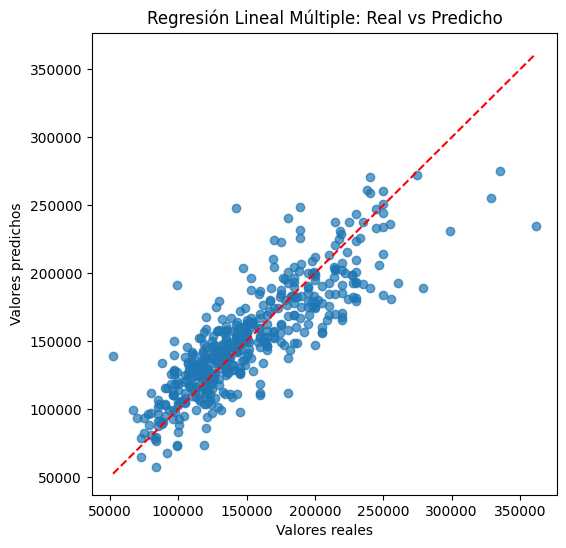

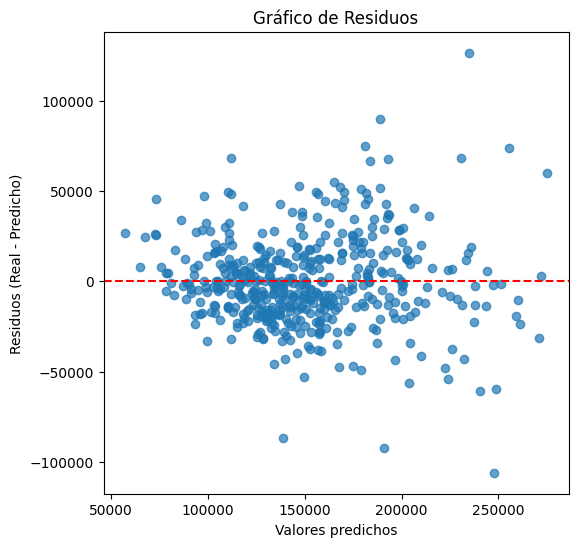

In [24]:
import matplotlib.pyplot as plt

# --- 1. Gráfico Real vs Predicho ---
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # línea ideal
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal Múltiple: Real vs Predicho")
plt.show()

# --- 2. Gráfico de Residuos ---
residuos = y_test - y_pred

plt.figure(figsize=(6,6))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Residuos (Real - Predicho)")
plt.title("Gráfico de Residuos")
plt.show()


In [25]:
# cuánto influye cada variable en el precio
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": model.coef_
})
print(coeficientes.sort_values(by="Coeficiente", ascending=False))

                 Variable   Coeficiente
6       Número de garajes  16283.571601
3             Superficie    1870.476198
5         Número de baños    476.914519
0                     Año    -49.155549
7       Piso de ubicación   -187.418432
1               Trimestre   -546.221237
8      Años de antigüedad  -1122.575476
4  Número de habitaciones  -7537.209991
2          Tipo de cambio  -9184.570203


In [26]:
import joblib

# Guardar el modelo entrenado en un archivo .pkl
joblib.dump(model, "dataset_magdalena.pkl")

['dataset_magdalena.pkl']

In [27]:
!ls

BELLAVISTA
MAGDALENA
dataset_bellavista.ipynb
dataset_bellavista.pkl
dataset_bellavista.xlsx
dataset_los_olivos.ipynb
dataset_los_olivos.pkl
dataset_los_olivos.xlsx
dataset_magdalena.ipynb
dataset_magdalena.pkl
dataset_magdalena.xlsx


---

---

In [28]:
# Cargar el modelo desde el archivo .pkl
modelo_cargado = joblib.load("dataset_magdalena.pkl")

# Ahora puedes usarlo directamente
y_pred = modelo_cargado.predict(X_test)

In [29]:
y_pred

array([ 97845.5272203 , 234323.31727573, 123918.09214209, 132045.6542059 ,
       130182.00907218, 154233.14340833, 101201.52575721, 132577.87760915,
       138571.5786957 , 148510.64751582, 106295.79844511,  99356.52653671,
       156084.07462244, 164398.97426814, 138521.43309935, 139200.0173635 ,
       169174.51043919,  73296.35473329, 132235.33566749, 194760.69155799,
       105015.0663062 , 175602.17282234,  96178.86993752, 152653.06055478,
       237905.20893814, 187546.41569835, 193651.10867264, 143150.66453721,
       134702.88821714, 223845.22407578, 149938.25640765, 161861.34576343,
       183624.52730435, 110411.9523621 , 123604.63426485, 255482.08397611,
       130705.90832856,  88549.60705777, 104465.56363538, 153000.94942054,
       167105.63618948, 138567.47241837, 150510.11769951, 202637.14737312,
       128736.57931321, 145627.21435289, 138969.33973872, 184511.54599415,
       206907.76450342, 127994.13886942, 170285.31713321, 244334.32642862,
       109601.86276556, 1

In [30]:
X_test

,Año,Trimestre,Tipo de cambio,Superficie,Número de habitaciones,Número de baños,Número de garajes,Piso de ubicación,Años de antigüedad
1646,2024,2,3.742923,57,2,2,0,0.000000,3
509,2022,1,3.806333,125,3,3,1,0.000000,3
1882,2024,3,3.757980,65,2,2,1,0.000000,7
44,2021,1,3.659334,70,2,2,1,0.016114,10
1586,2024,1,3.759223,70,3,2,1,0.000000,4
...,...,...,...,...,...,...,...,...,...
1681,2024,2,3.742923,84,2,2,1,0.000000,2
1820,2024,2,3.742923,80,2,2,0,0.000000,6
2250,2025,1,3.699348,84,3,2,1,0.000000,5
1736,2024,2,3.742923,52,1,1,1,0.000000,2


---